In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
from triangle import triangulate, plot as tplot, convex_hull, show_data, get_data
import symfem
from sympy import Rational as R
import matplotlib.colors as mcolors
from random import sample, choice
from tqdm import tqdm
from IPython.display import display
from utils import (
    get_middle_indices,
)

In [2]:
x, y, x_1, y_1, x_2, y_2, x_3, y_3 = sympy.symbols("x y x_1 y_1 x_2 y_2 x_3 y_3")
X, Y = sympy.symbols("X Y")

n1, n2, n3 = np.array(sympy.symbols("nx_1:4 ny_1:4")).reshape(2, 3).T
t1, t2, t3 = np.array(sympy.symbols("tx_1:4 ty_1:4")).reshape(2, 3).T

THETA = sympy.Matrix(np.array(sympy.symbols("H(1:4)1:4")).reshape(3, 3).tolist())

J = sympy.Matrix(np.array(sympy.symbols("J(1:3)1:3")).reshape(2, 2).tolist())

B1 = sympy.Matrix(np.array(sympy.symbols("BI_(1:3)1:3")).reshape(2, 2).tolist())
B2 = sympy.Matrix(np.array(sympy.symbols("BII_(1:3)1:3")).reshape(2, 2).tolist())
B3 = sympy.Matrix(np.array(sympy.symbols("BIII_(1:3)1:3")).reshape(2, 2).tolist())

tau_1 = sympy.Matrix([t1[0] ** 2, 2 * t1[0] * t1[1], t1[1] ** 2])
tau_2 = sympy.Matrix([t2[0] ** 2, 2 * t2[0] * t2[1], t2[1] ** 2])
tau_3 = sympy.Matrix([t3[0] ** 2, 2 * t3[0] * t3[1], t3[1] ** 2])

l1, l2, l3 = sympy.symbols("l1:4")

In [3]:
rot = np.array([
    [+0, +1],
    [-1, +0]
])

In [4]:
V_c = sympy.diag(
    1,
    J.inv().T,
    THETA.inv(),
    1,
    J.inv().T,
    THETA.inv(),
    1,
    J.inv().T,
    THETA.inv(),
    B1,
    B2,
    B3,
)

In [5]:
E = np.zeros((21, 24), dtype=int)
for i in range(21):
    for j in range(24):
        if (i <= 18) and (j <= 18) and (i == j):
            E[i][j] = 1
        elif (i == 19) and (j == 20):
            E[i][j] = 1
        elif (i == 20) and (j == 22):
            E[i][j] = 1
E = sympy.Matrix(E)

In [6]:
D = sympy.Matrix(
    [
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [
            0,
            0,
            0,
            0,
            0,
            0,
            -R(15, 8) / l1,
            -R(7, 16) * t1[0],
            -R(7, 16) * t1[1],
            -l1 / 32 * tau_1[0],
            -l1 / 32 * tau_1[1],
            -l1 / 32 * tau_1[2],
            +R(15, 8) / l1,
            -R(7, 16) * t1[0],
            -R(7, 16) * t1[1],
            +l1 / 32 * tau_1[0],
            +l1 / 32 * tau_1[1],
            +l1 / 32 * tau_1[2],
            0,
            0,
            0,
        ],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [
            -R(15, 8) / l2,
            -R(7, 16) * t2[0],
            -R(7, 16) * t2[1],
            -l2 / 32 * tau_2[0],
            -l2 / 32 * tau_2[1],
            -l2 / 32 * tau_2[2],
            0,
            0,
            0,
            0,
            0,
            0,
            +R(15, 8) / l2,
            -R(7, 16) * t2[0],
            -R(7, 16) * t2[1],
            +l2 / 32 * tau_2[0],
            +l2 / 32 * tau_2[1],
            +l2 / 32 * tau_2[2],
            0,
            0,
            0,
        ],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [
            -R(15, 8) / l3,
            -R(7, 16) * t3[0],
            -R(7, 16) * t3[1],
            -l3 / 32 * tau_3[0],
            -l3 / 32 * tau_3[1],
            -l3 / 32 * tau_3[2],
            +R(15, 8) / l3,
            -R(7, 16) * t3[0],
            -R(7, 16) * t3[1],
            +l3 / 32 * tau_3[0],
            +l3 / 32 * tau_3[1],
            +l3 / 32 * tau_3[2],
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
        ],
    ]
)

In [7]:
M = (E @ V_c @ D).T

In [8]:
triangle_sym = np.array(
    [
        [x_1, y_1],
        [x_2, y_2],
        [x_3, y_3],
    ]
)

In [9]:
syms = [
    *n1,*n2,*n3,
    *t1,*t2,*t3,
    l1,l2,l3,
    *np.array(J.tolist()).flatten(),
    *np.array(THETA.tolist()).flatten(),
    *np.array(B1.tolist()).flatten(), *np.array(B2.tolist()).flatten(), *np.array(B3.tolist()).flatten(),
]

In [10]:
argyris_basis = symfem.create_element("triangle", "Argyris", 5)
argyris_basis_ref = sympy.Matrix([argyris_basis.get_basis_functions()]).T

In [11]:
def orient(arg):
    
    indices = np.argsort(arg[:3])
    oriented = np.concatenate([arg[:3][indices], arg[3:][indices]])
    
    return oriented

In [12]:
LM = sympy.lambdify(syms, M)

In [13]:
def transform_basis(points, triangles, tindex):
    
    MAP = argyris_basis.reference.get_map_to(triangle_sym)
    INV_MAP = argyris_basis.reference.get_inverse_map_to(triangle_sym)


    oriented_triangle = orient(triangles[tindex])
    trng = points[oriented_triangle]


    u = INV_MAP[0].subs(
        {
            x_1: trng[0, 0],
            x_2: trng[1, 0],
            x_3: trng[2, 0],
            y_1: trng[0, 1],
            y_2: trng[1, 1],
            y_3: trng[2, 1],
        }
    )

    v = INV_MAP[1].subs(
        {
            x_1: trng[0, 0],
            x_2: trng[1, 0],
            x_3: trng[2, 0],
            y_1: trng[0, 1],
            y_2: trng[1, 1],
            y_3: trng[2, 1],
        }
    )
    

    J = sympy.Matrix([u, v]).jacobian([x, y])

    THETA = sympy.Matrix(
        [
            [u.diff(x) ** 2, 2 * u.diff(x) * v.diff(x), v.diff(x) ** 2],
            [
             u.diff(y) * u.diff(x), u.diff(y) * v.diff(x) + u.diff(x) * v.diff(y), v.diff(x) * v.diff(y),
            ],
            [u.diff(y) ** 2, 2 * u.diff(y) * v.diff(y), v.diff(y) ** 2],
        ]
    )

    l1 = (((x_2 - x_3) ** 2 + (y_2 - y_3) ** 2) ** 0.5).subs(
        {
            x_1: trng[0, 0],
            x_2: trng[1, 0],
            x_3: trng[2, 0],
            y_1: trng[0, 1],
            y_2: trng[1, 1],
            y_3: trng[2, 1],
        }
    )

    l2 = (((x_1 - x_3) ** 2 + (y_1 - y_3) ** 2) ** 0.5).subs(
        {
            x_1: trng[0, 0],
            x_2: trng[1, 0],
            x_3: trng[2, 0],
            y_1: trng[0, 1],
            y_2: trng[1, 1],
            y_3: trng[2, 1],
        }
    )

    l3 = (((x_1 - x_2) ** 2 + (y_1 - y_2) ** 2) ** 0.5).subs(
        {
            x_1: trng[0, 0],
            x_2: trng[1, 0],
            x_3: trng[2, 0],
            y_1: trng[0, 1],
            y_2: trng[1, 1],
            y_3: trng[2, 1],
        }
    )

    t1 = trng[2] - trng[1]
    t1 = t1 / np.linalg.norm(t1)
    n1 = rot @ t1
    

    t2 = trng[2] - trng[0]
    t2 = t2 / np.linalg.norm(t2)
    n2 = rot @ t2

    
    t3 = trng[1] - trng[0]
    t3 = t3 / np.linalg.norm(t3)
    n3 = rot @ t3

    G1 = sympy.Matrix([[*n1], [*t1]])
    G2 = sympy.Matrix([[*n2], [*t2]])
    G3 = sympy.Matrix([[*n3], [*t3]])

    G1_hat = sympy.Matrix(
        [
            [-np.sqrt(1 / 2), -np.sqrt(1 / 2)],
            [-np.sqrt(1 / 2), +np.sqrt(1 / 2)],
        ]
    )
    G2_hat = sympy.Matrix(
        [
            [-1, +0],
            [+0, +1],
        ]
    )
    G3_hat = sympy.Matrix(
        [
            [+0, +1], 
            [+1, +0]
        ]
    )
    
    B1 = G1_hat @ J.inv().T @ G1.T
    B2 = G2_hat @ J.inv().T @ G2.T
    B3 = G3_hat @ J.inv().T @ G3.T

    local_M = LM(*n1,*n2,*n3,
                *t1,*t2,*t3,
                l1,l2,l3,
                *np.array(J.tolist()).flatten(),
                *np.array(THETA.tolist()).flatten(),
                *np.array(B1.tolist()).flatten(),
                *np.array(B2.tolist()).flatten(),
                *np.array(B3.tolist()).flatten(),
                )

    new_basis = local_M @ argyris_basis_ref
    new_basis_F = new_basis.subs(x, X).subs(y, Y).subs(X, u).subs(Y, v)
    
    return new_basis_F, oriented_triangle

In [41]:
t = np.linspace(0, 2 * np.pi, 10, endpoint=False)
points = np.stack((np.cos(t), np.sin(t))).T
seg = np.array(
    [[j, j + 1] for j in range(points.shape[0] - 1)] + [[points.shape[0] - 1, 0]]
)

In [42]:
cndt = triangulate({"vertices": points, "segments": seg}, opts="pq1a0.2neo2")
points = cndt["vertices"]
triangles = cndt["triangles"]
neighbours = cndt["neighbors"]
edges = cndt["edges"]
vertex_maker_is_boundary = cndt["vertex_markers"]

### Separate middle points

In [43]:
is_middle = get_middle_indices(points.shape[0], triangles)

100%|██████████████████████████████████████████| 22/22 [00:00<00:00, 389.08it/s]


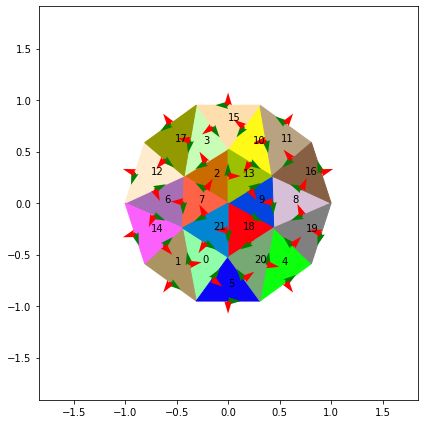

In [44]:
all_colors = (
    list(mcolors.CSS4_COLORS.keys())
    + list(mcolors.XKCD_COLORS.keys())
    + list(mcolors.BASE_COLORS.keys())
)
colors = sample(all_colors, triangles.shape[0])

%matplotlib inline
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("equal")

for index, triangle in enumerate(tqdm(points[triangles])):
    t1 = plt.Polygon(triangle[:3], color=colors[index])
    fig.gca().add_patch(t1)
    ax.text(triangle[:, 0].mean(), triangle[:, 1].mean(), f"{index}")


if True:
    for eidx, edge in enumerate(edges):

        mn = edge.min()
        mx = edge.max()
        mp = points[edge].mean(axis=0)

        T = points[mx] - points[mn]
        T = T / np.linalg.norm(T)
        N = rot @ T

        ax.quiver(*mp, *T, color="green", scale=30)
        ax.quiver(*mp, *N, color="red", scale=30)
        
        pos = points[edge].mean(axis=0)

ax.set_xlim([points[:, 0].min() - 1, points[:, 0].max() + 1])
ax.set_ylim([points[:, 1].min() - 1, points[:, 1].max() + 1])

fig.tight_layout()
plt.tight_layout()

plt.show()

In [45]:
tx = np.linspace(-1., 1., 1000)
ty = np.linspace(-1., 1., 1000)
mx, my = np.meshgrid(tx, ty, indexing="ij")

In [46]:
total_points = points.shape[0]
num_midpoints = is_middle.sum()
num_nodes = total_points - num_midpoints
NUM = 6 * num_nodes + num_midpoints

In [67]:
test_fn = sympy.sin(10*x*y)

test_fn_x = sympy.diff(test_fn, x)
test_fn_y = sympy.diff(test_fn, y)

test_fn_xx = sympy.diff(test_fn, x, x)
test_fn_xy = sympy.diff(test_fn, x, y)
test_fn_yy = sympy.diff(test_fn, y, y)

In [68]:
test_fn_vals = np.zeros((points.shape[0], 6))

for point_index, point in enumerate(points):
    
    test_fn_vals[point_index][0] = sympy.lambdify((x, y), test_fn)(*points[point_index])
    test_fn_vals[point_index][1] = sympy.lambdify((x, y), test_fn_x)(
        *points[point_index]
    )
    test_fn_vals[point_index][2] = sympy.lambdify((x, y), test_fn_y)(
        *points[point_index]
    )
    test_fn_vals[point_index][3] = sympy.lambdify((x, y), test_fn_xx)(
        *points[point_index]
    )
    test_fn_vals[point_index][4] = sympy.lambdify((x, y), test_fn_xy)(
        *points[point_index]
    )
    test_fn_vals[point_index][5] = sympy.lambdify((x, y), test_fn_yy)(
        *points[point_index]
    )

In [69]:
interpolation = np.zeros_like(mx)
original = np.zeros_like(mx)

points_ = np.stack((mx, my)).transpose(1, 2, 0)

for idx, triangle in enumerate(triangles):
        
    print(f"\rTrinagle {idx}", end="", sep="")

    CURRENT_BASIS, p_idx = transform_basis(points, triangles, idx)
    
    t_points = points[p_idx][:3]

    a = t_points[1] - t_points[0]
    b = t_points[2] - t_points[0]

    areas = np.abs(a[0] * b[1] - a[1] * b[0])

    a = points_[...,] - t_points[0, None, None]
    b = points_[...,] - t_points[1, None, None]
    c = points_[...,] - t_points[2, None, None]

    area1 = np.abs(a[..., 0] * b[..., 1] - a[..., 1] * b[..., 0])
    area2 = np.abs(a[..., 0] * c[..., 1] - a[..., 1] * c[..., 0])
    area3 = np.abs(b[..., 0] * c[..., 1] - b[..., 1] * c[..., 0])
    indices = np.where(np.isclose((area1 + area2 + area3), areas))

    on_1 = sympy.Float(0)
    on_2 = sympy.Float(0)
    on_3 = sympy.Float(0)

    
    #   U
    on_1 += CURRENT_BASIS[0] * test_fn_vals[p_idx[0]][0]
    on_2 += CURRENT_BASIS[6] * test_fn_vals[p_idx[1]][0]
    on_3 += CURRENT_BASIS[12] * test_fn_vals[p_idx[2]][0]

    #   U_x
    on_1 += CURRENT_BASIS[1] * test_fn_vals[p_idx[0]][1]
    on_2 += CURRENT_BASIS[7] * test_fn_vals[p_idx[1]][1]
    on_3 += CURRENT_BASIS[13] * test_fn_vals[p_idx[2]][1]

    #   U_y
    on_1 += CURRENT_BASIS[2] * test_fn_vals[p_idx[0]][2]
    on_2 += CURRENT_BASIS[8] * test_fn_vals[p_idx[1]][2]
    on_3 += CURRENT_BASIS[14] * test_fn_vals[p_idx[2]][2]

    #   U_xx
    on_1 += CURRENT_BASIS[3] * test_fn_vals[p_idx[0]][3]
    on_2 += CURRENT_BASIS[9] * test_fn_vals[p_idx[1]][3]
    on_3 += CURRENT_BASIS[15] * test_fn_vals[p_idx[2]][3]

    #   U_xy
    on_1 += CURRENT_BASIS[4] * test_fn_vals[p_idx[0]][4]
    on_2 += CURRENT_BASIS[10] * test_fn_vals[p_idx[1]][4]
    on_3 += CURRENT_BASIS[16] * test_fn_vals[p_idx[2]][4]

    #   U_yy
    on_1 += CURRENT_BASIS[5] * test_fn_vals[p_idx[0]][5]
    on_2 += CURRENT_BASIS[11] * test_fn_vals[p_idx[1]][5]
    on_3 += CURRENT_BASIS[17] * test_fn_vals[p_idx[2]][5]

    #   U_n
    t1 = t_points[2] - t_points[1]
    t1 = t1 / np.linalg.norm(t1)
    n1 = rot @ t1
    t2 = t_points[2] - t_points[0]
    t2 = t2 / np.linalg.norm(t2)
    n2 = rot @ t2
    t3 = t_points[1] - t_points[0]
    t3 = t3 / np.linalg.norm(t3)
    n3 = rot @ t3
    
    AAA = n1[0]*sympy.lambdify((x, y), test_fn_x)(*points[p_idx[3]]) + n1[1]*sympy.lambdify((x, y), test_fn_y)(*points[p_idx[3]])
    BBB = n2[0]*sympy.lambdify((x, y), test_fn_x)(*points[p_idx[4]]) + n2[1]*sympy.lambdify((x, y), test_fn_y)(*points[p_idx[4]])
    CCC = n3[0]*sympy.lambdify((x, y), test_fn_x)(*points[p_idx[5]]) + n3[1]*sympy.lambdify((x, y), test_fn_y)(*points[p_idx[5]])
    
    on_1 += CURRENT_BASIS[18] * AAA
    on_2 += CURRENT_BASIS[19] * BBB
    on_3 += CURRENT_BASIS[20] * CCC

    total = on_1 + on_2 + on_3

    F = sympy.lambdify((x, y), total)

    MZ = F(mx, my)

    if isinstance(MZ, (int, float)):
        MZ = np.zeros_like(mx) + MZ

    interpolation[indices] = MZ[indices]
    original[indices] = sympy.lambdify((x, y), test_fn)(mx, my)[indices]

Trinagle 21

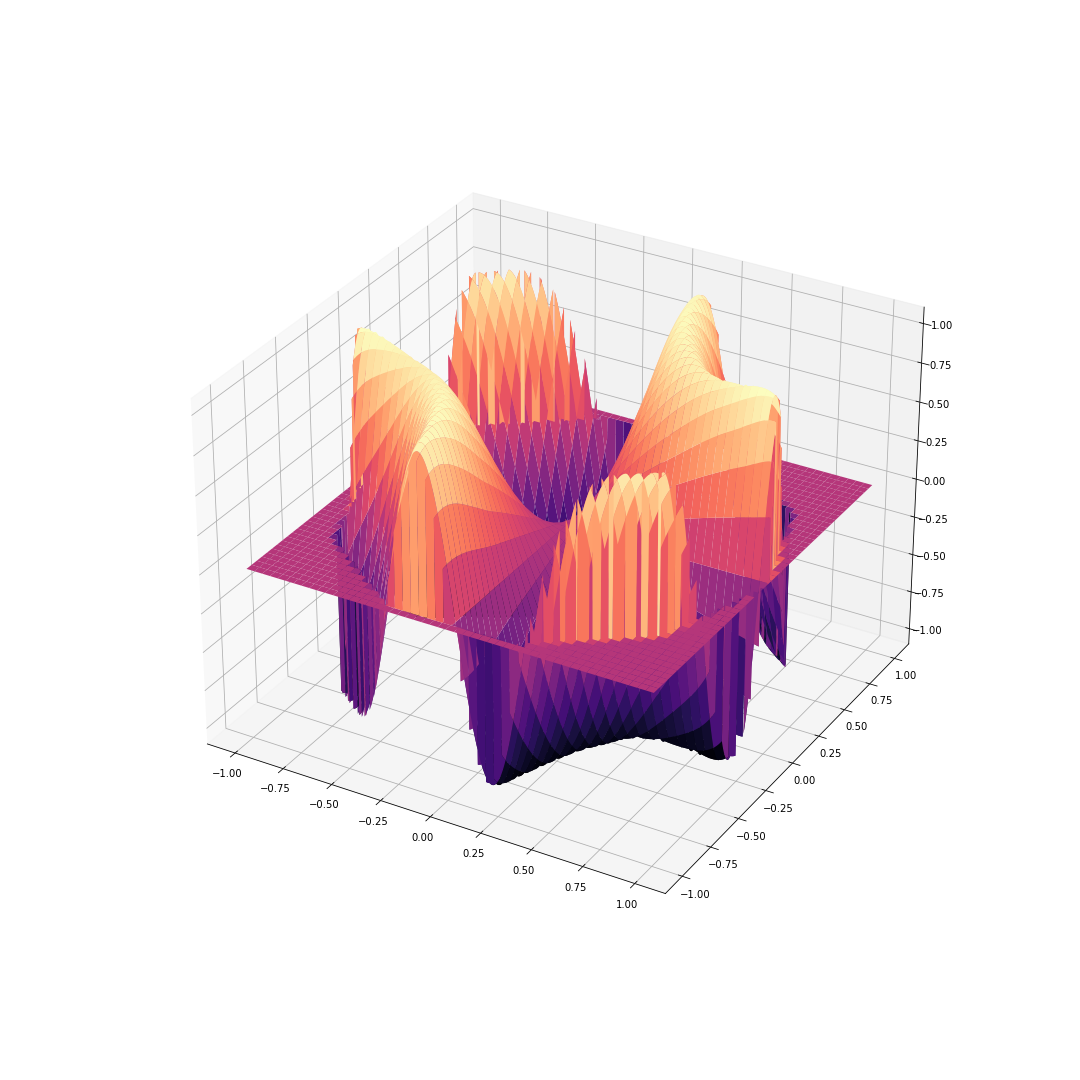

In [72]:
%matplotlib widget
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection="3d")
ax.plot_surface(mx, my, interpolation, cmap="magma")
plt.show()